<a href="https://colab.research.google.com/github/AliyaBadmaeva/rest_api/blob/main/HW_BadmaevaAA_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание: "Получение данных по REST API"
Курс “Python для автоматизации и анализа данных”

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json
import plotly.express as px
from wordcloud import WordCloud

## Парсинг вакансий с сайта hh.ru

 https://api.hh.ru/professional_roles

In [ ]:
start_dt = '2025-02-01' # дата начала поиска
end_dt = '2025-02-24'  # дата окончания поиска

In [ ]:
HEADERS = {'User-Agent': 'api-test-agent'}

In [ ]:
url = 'https://api.hh.ru/vacancies'

In [ ]:
#params = {'area': '1', 'start_dt': start_dt, 'end_dt': end_dt, 'professional_roles': '165', 'page': page_number}

In [ ]:
page_num = 0
parameters = {'area': '1','date_from': start_dt,'date_to': end_dt,'professional_role': '165', 'page': 0}
url = 'https://api.hh.ru/vacancies'
res = requests.get(url, headers=HEADERS, params=parameters)
dt = pd.DataFrame(res.json()['items'])

In [ ]:
dt

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,night_shifts,professional_roles,accept_incomplete_resumes,experience,employment,employment_form,internship,adv_response_url,is_adv_vacancy,adv_context
0,117644216,False,Python разработчик,"{'id': '201-201-finsect', 'name': 'Kept, Услуг...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'FULL', 'name': 'Полная'}",False,None,False,None
1,117152095,False,Junior Data Scientist \ Аналитик,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 50000, 'to': 60000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",None,...,False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'FULL', 'name': 'Полная'}",False,None,False,None
2,117464807,False,Data Scientist,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': None, 'to': 100000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': None, 'street': None, 'building': Non...",...,False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'FULL', 'name': 'Полная'}",False,None,False,None
3,117649197,False,Junior Data engineer,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 80000, 'to': 130000, 'currency': 'RUR...","{'id': 'open', 'name': 'Открытая'}",None,...,False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'FULL', 'name': 'Полная'}",False,None,False,None
4,115928521,False,Стажер Data scientist,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': None, 'to': 80000, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",None,...,False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'FULL', 'name': 'Полная'}",True,None,False,None
5,117336243,False,Junior Data Scientist,"{'id': 'slum-2791-student', 'name': 'Schlumber...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Ленинградское шо...",...,False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'FULL', 'name': 'Полная'}",False,None,False,None
6,117652939,False,Data Engineer,None,True,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'FULL', 'name': 'Полная'}",False,None,False,None
7,117350056,False,Data Scientist Junior+,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Каланчевская ули...",...,False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'FULL', 'name': 'Полная'}",False,None,False,None
8,117556500,False,Data engineer (junior),"{'id': '522-522-it', 'name': 'ОМК ИТ'}",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'FULL', 'name': 'Полная'}",False,None,False,None
9

In [ ]:
while True:
    parameters = {'area': '1','date_from': start_dt,'date_to': end_dt,'professional_role': '165', 'page': page_num}
    HEADERS = {'User-Agent': 'api-test-agent'}

    url = 'https://api.hh.ru/vacancies'

    res = requests.get(url, headers=HEADERS, params=parameters)
    if not res.json()['items']:
        break
    dt = pd.concat([dt,pd.DataFrame(res.json()['items'])])
    page_num += 1

In [ ]:
res.json()

{'items': [],
 'found': 404,
 'pages': 21,
 'page': 21,
 'per_page': 20,
 'clusters': None,
 'arguments': None,
 'fixes': None,
 'suggests': None,
 'alternate_url': 'https://hh.ru/search/vacancy?area=1&date_from=01.02.2025&date_to=24.02.2025+23%3A59%3A59&enable_snippets=true&page=21&professional_role=165'}

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424 entries, 0 to 3
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         424 non-null    object
 1   premium                    424 non-null    bool  
 2   name                       424 non-null    object
 3   department                 108 non-null    object
 4   has_test                   424 non-null    bool  
 5   response_letter_required   424 non-null    bool  
 6   area                       424 non-null    object
 7   salary                     68 non-null     object
 8   type                       424 non-null    object
 9   address                    166 non-null    object
 10  response_url               0 non-null      object
 11  sort_point_distance        0 non-null      object
 12  published_at               424 non-null    object
 13  created_at                 424 non-null    object
 14  archived         

In [ ]:
dt['published_at'].value_counts().head(30)

,count
published_at,
2025-02-24T15:56:10+0300,2
2025-02-24T09:07:31+0300,2
2025-02-05T17:48:41+0300,2
2025-02-24T15:08:30+0300,2
2025-02-21T18:16:14+0300,2
2025-02-21T12:56:32+0300,2
2025-02-24T21:08:06+0300,2
2025-02-24T18:30:49+0300,2
2025-02-24T09:58:30+0300,2


In [ ]:
dt['id'].value_counts().head(30)

,count
id,
117644216,2
117354994,2
117152095,2
117582867,2
117652257,2
117613041,2
117617282,2
115989885,2
117629825,2


Возможно в данных есть дубли, но это могут быть две одинаковые вакансии по набору сотрудников в одно время со схожими профессиональными навыками. Не будем удалять дубли.

In [ ]:
dt.head(10)  # Посмотрим на полученные данные

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,night_shifts,professional_roles,accept_incomplete_resumes,experience,employment,employment_form,internship,adv_response_url,is_adv_vacancy,adv_context
0,117644216,False,Python разработчик,"{'id': '201-201-finsect', 'name': 'Kept, Услуг...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'FULL', 'name': 'Полная'}",False,None,False,None
1,117152095,False,Junior Data Scientist \ Аналитик,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 50000, 'to': 60000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",None,...,False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'FULL', 'name': 'Полная'}",False,None,False,None
2,117464807,False,Data Scientist,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': None, 'to': 100000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': None, 'street': None, 'building': Non...",...,False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'FULL', 'name': 'Полная'}",False,None,False,None
3,117649197,False,Junior Data engineer,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 80000, 'to': 130000, 'currency': 'RUR...","{'id': 'open', 'name': 'Открытая'}",None,...,False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'FULL', 'name': 'Полная'}",False,None,False,None
4,115928521,False,Стажер Data scientist,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': None, 'to': 80000, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",None,...,False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'FULL', 'name': 'Полная'}",True,None,False,None
5,117336243,False,Junior Data Scientist,"{'id': 'slum-2791-student', 'name': 'Schlumber...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Ленинградское шо...",...,False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'FULL', 'name': 'Полная'}",False,None,False,None
6,117652939,False,Data Engineer,None,True,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'FULL', 'name': 'Полная'}",False,None,False,None
7,117350056,False,Data Scientist Junior+,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Каланчевская ули...",...,False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'FULL', 'name': 'Полная'}",False,None,False,None
8,117556500,False,Data engineer (junior),"{'id': '522-522-it', 'name': 'ОМК ИТ'}",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'FULL', 'name': 'Полная'}",False,None,False,None
9

In [ ]:
dt['employer']

,employer
0,"{'id': '201', 'name': 'Kept (Кэпт)', 'url': 'h..."
1,"{'id': '3520239', 'name': 'M1', 'url': 'https:..."
2,"{'id': '1056818', 'name': 'BND LLC', 'url': 'h..."
3,"{'id': '5531122', 'name': 'Heaad', 'url': 'htt..."
4,"{'id': '9368347', 'name': 'А ДЕНЬГИ', 'url': '..."
...,...
19,"{'id': '1588269', 'name': 'Чанъань Моторс Рус'..."
0,"{'id': '128241', 'name': 'AMarkets', 'url': 'h..."
1,"{'id': '1829949', 'name': 'Звук', 'url': 'http..."
2,"{'id': '1375441', 'name': 'Okko', 'url': 'http..."


In [ ]:
def work_format_col(k):
  names = ''
  for i in range(len(k)):
    names += k[i]['name'] + ' '
  return names

In [ ]:
clean_dt = dt[['name','salary','employer','snippet','employment','work_format','experience']]

In [ ]:
# достаем из словаря в строках колонки employer значение по ключу name
clean_dt['employer'] = clean_dt['employer'].apply(lambda x: x['name'])

<ipython-input-481-5599322cb443>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_dt['employer'] = clean_dt['employer'].apply(lambda x: x['name'])


In [ ]:
clean_dt

,name,salary,employer,snippet,employment,work_format,experience
0,Python разработчик,None,Kept (Кэпт),"{'requirement': 'Образование – математика, инф...","{'id': 'full', 'name': 'Полная занятость'}",[],"{'id': 'between1And3', 'name': 'От 1 года до 3..."
1,Junior Data Scientist \ Аналитик,"{'from': 50000, 'to': 60000, 'currency': 'RUR'...",M1,{'requirement': 'Работать с большими объемами ...,"{'id': 'full', 'name': 'Полная занятость'}","[{'id': 'REMOTE', 'name': 'Удалённо'}]","{'id': 'between1And3', 'name': 'От 1 года до 3..."
2,Data Scientist,"{'from': None, 'to': 100000, 'currency': 'RUR'...",BND LLC,{'requirement': 'Высшее образование (математич...,"{'id': 'full', 'name': 'Полная занятость'}","[{'id': 'HYBRID', 'name': 'Гибрид'}]","{'id': 'noExperience', 'name': 'Нет опыта'}"
3,Junior Data engineer,"{'from': 80000, 'to': 130000, 'currency': 'RUR...",Heaad,{'requirement': 'высшее техническое\ИТ-образов...,"{'id': 'full', 'name': 'Полная занятость'}","[{'id': 'REMOTE', 'name': 'Удалённо'}]","{'id': 'between1And3', 'name': 'От 1 года до 3..."
4,Стажер Data scientist,"{'from': None, 'to': 80000, 'currency': 'RUR',...",А ДЕНЬГИ,"{'requirement': 'Уметь работать с Git, Docker....","{'id': 'full', 'name': 'Полная занятость'}","[{'id': 'REMOTE', 'name': 'Удалённо'}]","{'id': 'noExperience', 'name': 'Нет опыта'}"
...,...,...,...,...,...,...,...
19,Cloud Operations Engineer,None,Чанъань Моторс Рус,{'requirement': 'Education in Computer Science...,"{'id': 'full', 'name': 'Полная занятость'}","[{'id': 'ON_SITE', 'name': 'На месте работодат...","{'id': 'between3And6', 'name': 'От 3 до 6 лет'}"
0,Data scientist,None,AMarkets,{'requirement': 'Опыт работы в FinTech: брокер...,"{'id': 'full', 'name': 'Полная занятость'}",[],"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}"
1,Team lead ML RecSys,None,Звук,{'requirement': 'Техническое образование. Опыт...,"{'id': 'full', 'name': 'Полная занятость'}","[{'id': 'REMOTE', 'name': 'Удалённо'}]","{'id': 'between3And6', 'name': 'От 3 до 6 лет'}"
2,"Senior ML Engineer (Uplift), группа ""Search""",None,Okko,{'requirement': 'Опыт работы в Машинном обучен...,"{'id': 'full', 'name': 'Полная занятость'}","[{'id': 'ON_SITE', 'name': 'На месте работодат...","{'id': 'between3And6', 'name': 'От 3 до 6 лет'}"


In [ ]:
clean_dt['employment'] = clean_dt['employment'].apply(lambda x: x['name'])

<ipython-input-483-06c106299001>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_dt['employment'] = clean_dt['employment'].apply(lambda x: x['name'])


In [ ]:
clean_dt['currency'] = clean_dt['salary'].apply(lambda x: x['currency'] if x else None)

<ipython-input-484-203e46c1d932>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_dt['currency'] = clean_dt['salary'].apply(lambda x: x['currency'] if x else None)


In [ ]:
clean_dt['salary_starts_from'] = clean_dt['salary'].apply(lambda x: x['from']if x else None)
clean_dt['salary_to'] = clean_dt['salary'].apply(lambda x: x['to']if x else None)

<ipython-input-485-faadc5cdb8e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_dt['salary_starts_from'] = clean_dt['salary'].apply(lambda x: x['from']if x else None)
<ipython-input-485-faadc5cdb8e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_dt['salary_to'] = clean_dt['salary'].apply(lambda x: x['to']if x else None)


In [ ]:
clean_dt['requirement'] = clean_dt['snippet'].apply(lambda x: x['requirement'])

<ipython-input-486-cd382f304b93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_dt['requirement'] = clean_dt['snippet'].apply(lambda x: x['requirement'])


In [ ]:
clean_dt['responsib'] = clean_dt['snippet'].apply(lambda x: x['responsibility'])
clean_dt['experience'] = clean_dt['experience'].apply(lambda x: x['name'])

<ipython-input-487-b2f7630b65d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_dt['responsib'] = clean_dt['snippet'].apply(lambda x: x['responsibility'])
<ipython-input-487-b2f7630b65d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_dt['experience'] = clean_dt['experience'].apply(lambda x: x['name'])


In [ ]:
clean_dt['work_format'] = clean_dt['work_format'].apply(work_format_col)

<ipython-input-488-37753720aeaf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_dt['work_format'] = clean_dt['work_format'].apply(work_format_col)


In [ ]:
clean_dt

,name,salary,employer,snippet,employment,work_format,experience,currency,salary_starts_from,salary_to,requirement,responsib
0,Python разработчик,None,Kept (Кэпт),"{'requirement': 'Образование – математика, инф...",Полная занятость,,От 1 года до 3 лет,None,NaN,NaN,"Образование – математика, информатика, информа...",Принимать участие в проектах по разработке ИТ-...
1,Junior Data Scientist \ Аналитик,"{'from': 50000, 'to': 60000, 'currency': 'RUR'...",M1,{'requirement': 'Работать с большими объемами ...,Полная занятость,Удалённо,От 1 года до 3 лет,RUR,50000.0,60000.0,Работать с большими объемами данных. Анализиро...,None
2,Data Scientist,"{'from': None, 'to': 100000, 'currency': 'RUR'...",BND LLC,{'requirement': 'Высшее образование (математич...,Полная занятость,Гибрид,Нет опыта,RUR,NaN,100000.0,"Высшее образование (математическое, техническо...",Собирать и готовить данные для использования в...
3,Junior Data engineer,"{'from': 80000, 'to': 130000, 'currency': 'RUR...",Heaad,{'requirement': 'высшее техническое\ИТ-образов...,Полная занятость,Удалённо,От 1 года до 3 лет,RUR,80000.0,130000.0,высшее техническое\ИТ-образование. - Владение ...,Участвовать в полном жизненном цикле разработк...
4,Стажер Data scientist,"{'from': None, 'to': 80000, 'currency': 'RUR',...",А ДЕНЬГИ,"{'requirement': 'Уметь работать с Git, Docker....",Полная занятость,Удалённо,Нет опыта,RUR,NaN,80000.0,"Уметь работать с Git, Docker. Писать чистый ко...",Подсчет экономической целесообразности модели....
...,...,...,...,...,...,...,...,...,...,...,...,...
19,Cloud Operations Engineer,None,Чанъань Моторс Рус,{'requirement': 'Education in Computer Science...,Полная занятость,На месте работодателя,От 3 до 6 лет,None,NaN,NaN,"Education in Computer Science, Engineering, or...",Cloud Infrastructure Management: Manage public...
0,Data scientist,None,AMarkets,{'requirement': 'Опыт работы в FinTech: брокер...,Полная занятость,,От 3 до 6 лет,None,NaN,NaN,"Опыт работы в FinTech: брокерских, букмекерски...",Разработка моделей прогнозирования и моделиров...
1,Team lead ML RecSys,None,Звук,{'requirement': 'Техническое образование. Опыт...,Полная занятость,Удалённо,От 3 до 6 лет,None,NaN,NaN,Техническое образование. Опыт управления коман...,Команда ML Recsys (группа оффлайн рекомендаций...
2,"Senior ML Engineer (Uplift), группа ""Search""",None,Okko,{'requirement': 'Опыт работы в Машинном обучен...,Полная занятость,На месте работодателя Удалённо Гибрид,От 3 до 6 лет,None,NaN,NaN,Опыт работы в Машинном обучении не менее 5 лет...,Разработка и внедрение моделей машинного обуче...


In [ ]:
eur = clean_dt[clean_dt['currency'] == "EUR"]
eur

,name,salary,employer,snippet,employment,work_format,experience,currency,salary_starts_from,salary_to,requirement,responsib
10,Data Engineer,"{'from': 4000, 'to': None, 'currency': 'EUR', ...",Топассистент,{'requirement': 'высшее образование (экономика...,Полная занятость,На месте работодателя,От 3 до 6 лет,EUR,4000.0,NaN,"высшее образование (экономика, математика). - ...",настройка и оптимизация ETL/ELT-пайплайнов (Ai...
0,Data Scientist (с опытом в антифроде и Forex),"{'from': 5500, 'to': None, 'currency': 'EUR', ...",Лепёхина Лилия Миниахматовна,{'requirement': 'Что хотим видеть в тебе: Обяз...,Полная занятость,На месте работодателя,От 3 до 6 лет,EUR,5500.0,NaN,Что хотим видеть в тебе: Обязательный опыт раб...,Анализировать и интерпретировать сложные набор...
0,Senior Data Scientist (Recommender Systems),"{'from': 5000, 'to': 6500, 'currency': 'EUR', ...",FunCorp,{'requirement': 'Опыт построения ленты рекомен...,Полная занятость,Удалённо,От 3 до 6 лет,EUR,5000.0,6500.0,Опыт построения ленты рекомендаций. Опыт полно...,"Сбор, обработка и исследование данных. Поиск г..."


In [ ]:
clean_dt['currency'].value_counts()

,count
currency,
RUR,54
USD,11
EUR,3


In [ ]:
doll = clean_dt[clean_dt['currency'] == "USD"]  # интересно посмотреть на зарплаты в долларах
doll.describe()

,salary_starts_from,salary_to
count,9.000000,8.000000
mean,3691.666667,5924.375000
std,2479.541288,4614.244589
min,25.000000,45.000000
25%,2200.000000,2587.500000
50%,4000.000000,6000.000000
75%,5000.000000,7750.000000
max,8000.000000,14000.000000


In [ ]:
doll

,name,salary,employer,snippet,employment,work_format,experience,currency,salary_starts_from,salary_to,requirement,responsib
0,Senior Data Engineer,"{'from': None, 'to': 7000, 'currency': 'USD', ...",Дартс рекрутинг сервисез,{'requirement': 'Опыт разработки на Python от ...,Полная занятость,Удалённо,От 3 до 6 лет,USD,NaN,7000.0,Опыт разработки на Python от 3-х лет и более. ...,Вы будете строить и поддерживать внутренний Da...
16,Machine Learning Engineer,"{'from': 2200, 'to': 3000, 'currency': 'USD', ...",DevCube,{'requirement': 'Technical Skills. – Machine L...,Полная занятость,Удалённо,От 3 до 6 лет,USD,2200.0,3000.0,Technical Skills. – Machine Learning & AI: Str...,"Design, develop, and deploy machine learning m..."
12,Senior ML Engineer/ML Researcher/Data Scientist,"{'from': 5000, 'to': 7000, 'currency': 'USD', ...",Найденко Максим Викторович,{'requirement': '2. Универсальная AI-платформа...,Полная занятость,Удалённо,Более 6 лет,USD,5000.0,7000.0,2. Универсальная AI-платформа. Интеграции AI в...,1. Локальный AI-агент (голосовой помощник). Го...
12,"Senior ML-Engineer (NLP, CV, TTS)","{'from': 6000, 'to': 10000, 'currency': 'USD',...",High Sky,{'requirement': 'Опыт работы от 6 лет. Опыт ко...,Полная занятость,Удалённо,Более 6 лет,USD,6000.0,10000.0,Опыт работы от 6 лет. Опыт коммерческой разраб...,Применение SOTA DL-решений для конкретных AI-з...
9,Senior NLP Engineer (Prompt Compression for LLM),"{'from': 8000, 'to': 14000, 'currency': 'USD',...",High Sky,{'requirement': 'Опыт коммерческой разработки ...,Полная занятость,Удалённо,Более 6 лет,USD,8000.0,14000.0,Опыт коммерческой разработки python от 6 лет. ...,Решать задачу “Prompt Compression for LLM”. Пр...
12,ML-инженер (Predictive),"{'from': 3000, 'to': None, 'currency': 'USD', ...",Choosy Recruitment,{'requirement': 'Уверенные навыки программиров...,Полная занятость,Гибрид,От 3 до 6 лет,USD,3000.0,NaN,Уверенные навыки программирования на Python. З...,"Анализом CPA-трафика, сбором и обработкой боль..."
7,ML Engineer (Consulting),"{'from': 25, 'to': 45, 'currency': 'USD', 'gro...",EmFi Technologies Limited,{'requirement': 'Глубокий опыт в AI: работа с ...,Частичная занятость,Удалённо,Более 6 лет,USD,25.0,45.0,Глубокий опыт в AI: работа с мультиагентными с...,Мы создаем автономных AI-агентов с возможность...
3,Data Scientist,"{'from': 1000, 'to': 1350, 'currency': 'USD', ...",HelloChakra LLC,"{'requirement': 'Specific experience with GA4,...",Полная занятость,Удалённо,От 1 года до 3 лет,USD,1000.0,1350.0,"Specific experience with GA4, Shopify, ClickFu...",Application: Everything starts with getting in...
0,Middle ML Engineer (NLP),"{'from': 4000, 'to': None, 'currency': 'USD', ...",Americor Funding Inc,{'requirement': 'Опыт работы с Python от 3 лет...,Полная занятость,Удалённо,От 3 до 6 лет,USD,4000.0,NaN,Опыт работы с Python от 3 лет. Понимание транс...,Добавление новых функций и расширение возможно...
10,Senior AI-Engineer,"{'from': None, 'to': 5000, 'currency': 'USD', ...",FunCorp,"{'requirement': '5+ лет инженерного опыта, вкл...",Полная занятость,Удалённо,От 3 до 6 лет,USD,NaN,5000.0,"5+ лет инженерного опыта, включая создание и в...",None


In [ ]:
eur = clean_dt[clean_dt['currency'] == "EUR"]  # интересно посмотреть на зарплаты в евро
eur.describe()

,salary_starts_from,salary_to
count,3.000000,1.0
mean,4833.333333,6500.0
std,763.762616,NaN
min,4000.000000,6500.0
25%,4500.000000,6500.0
50%,5000.000000,6500.0
75%,5250.000000,6500.0
max,5500.000000,6500.0


In [ ]:
eur

,name,salary,employer,snippet,employment,work_format,experience,currency,salary_starts_from,salary_to,requirement,responsib
10,Data Engineer,"{'from': 4000, 'to': None, 'currency': 'EUR', ...",Топассистент,{'requirement': 'высшее образование (экономика...,Полная занятость,На месте работодателя,От 3 до 6 лет,EUR,4000.0,NaN,"высшее образование (экономика, математика). - ...",настройка и оптимизация ETL/ELT-пайплайнов (Ai...
0,Data Scientist (с опытом в антифроде и Forex),"{'from': 5500, 'to': None, 'currency': 'EUR', ...",Лепёхина Лилия Миниахматовна,{'requirement': 'Что хотим видеть в тебе: Обяз...,Полная занятость,На месте работодателя,От 3 до 6 лет,EUR,5500.0,NaN,Что хотим видеть в тебе: Обязательный опыт раб...,Анализировать и интерпретировать сложные набор...
0,Senior Data Scientist (Recommender Systems),"{'from': 5000, 'to': 6500, 'currency': 'EUR', ...",FunCorp,{'requirement': 'Опыт построения ленты рекомен...,Полная занятость,Удалённо,От 3 до 6 лет,EUR,5000.0,6500.0,Опыт построения ленты рекомендаций. Опыт полно...,"Сбор, обработка и исследование данных. Поиск г..."


Зарплаты в долларах предполагают возможность удаленки и полную занятость, а для зарплат в евро всего 3 вакансии и 2 из них предполагают работу в офисе. Практически все вакансии в иностранных валютах предполагают наличие опыта от 3 до 6 лет и более.

В среднем предлагают зарплаты около 380 тысяч в переводе на рубли (вакансии в долларах)

In [ ]:
fresh_vacancies = clean_dt.drop(['salary', 'snippet'], axis=1)  # удаляем лишние признаки
fresh_vacancies

,name,employer,employment,work_format,experience,currency,salary_starts_from,salary_to,requirement,responsib
0,Python разработчик,Kept (Кэпт),Полная занятость,,От 1 года до 3 лет,None,NaN,NaN,"Образование – математика, информатика, информа...",Принимать участие в проектах по разработке ИТ-...
1,Junior Data Scientist \ Аналитик,M1,Полная занятость,Удалённо,От 1 года до 3 лет,RUR,50000.0,60000.0,Работать с большими объемами данных. Анализиро...,None
2,Data Scientist,BND LLC,Полная занятость,Гибрид,Нет опыта,RUR,NaN,100000.0,"Высшее образование (математическое, техническо...",Собирать и готовить данные для использования в...
3,Junior Data engineer,Heaad,Полная занятость,Удалённо,От 1 года до 3 лет,RUR,80000.0,130000.0,высшее техническое\ИТ-образование. - Владение ...,Участвовать в полном жизненном цикле разработк...
4,Стажер Data scientist,А ДЕНЬГИ,Полная занятость,Удалённо,Нет опыта,RUR,NaN,80000.0,"Уметь работать с Git, Docker. Писать чистый ко...",Подсчет экономической целесообразности модели....
...,...,...,...,...,...,...,...,...,...,...
19,Cloud Operations Engineer,Чанъань Моторс Рус,Полная занятость,На месте работодателя,От 3 до 6 лет,None,NaN,NaN,"Education in Computer Science, Engineering, or...",Cloud Infrastructure Management: Manage public...
0,Data scientist,AMarkets,Полная занятость,,От 3 до 6 лет,None,NaN,NaN,"Опыт работы в FinTech: брокерских, букмекерски...",Разработка моделей прогнозирования и моделиров...
1,Team lead ML RecSys,Звук,Полная занятость,Удалённо,От 3 до 6 лет,None,NaN,NaN,Техническое образование. Опыт управления коман...,Команда ML Recsys (группа оффлайн рекомендаций...
2,"Senior ML Engineer (Uplift), группа ""Search""",Okko,Полная занятость,На месте работодателя Удалённо Гибрид,От 3 до 6 лет,None,NaN,NaN,Опыт работы в Машинном обучении не менее 5 лет...,Разработка и внедрение моделей машинного обуче...


In [ ]:
fresh_vacancies.to_csv('hh.csv')  # запись данных

[]

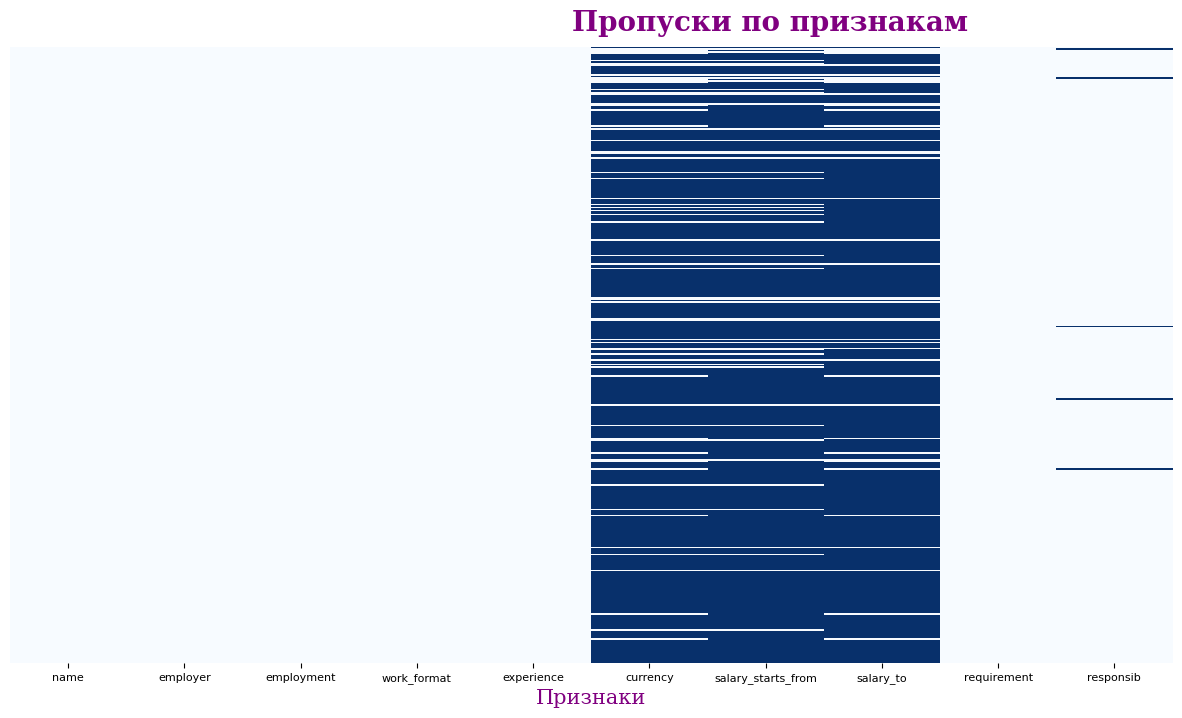

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15, 8))

fig.text(0.5, 0.90, 'Пропуски по признакам', fontsize=20, fontweight='bold', fontfamily='serif', color='purple')

ax = sns.heatmap(fresh_vacancies.isnull(), cmap='Blues', cbar=False, yticklabels=False)
ax.set_xlabel('Признаки', fontsize=15, fontweight='light', fontfamily='serif', color='purple')
ax.tick_params(axis='both', which='major', labelsize=8)
plt.plot()

Больше всего пропусков по признаккам зарплата и валюта

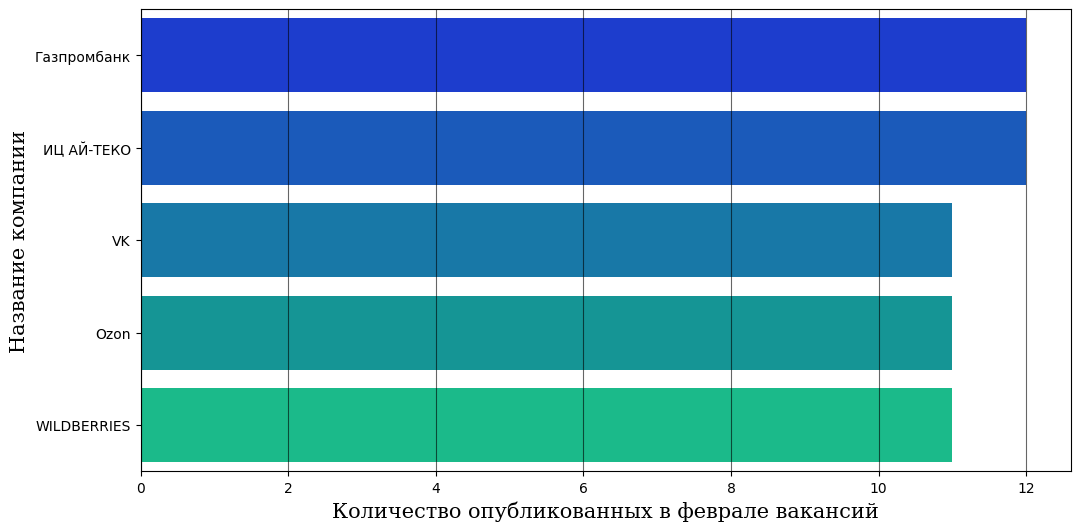

In [ ]:
vac = fresh_vacancies.groupby('employer').size().reset_index(name='count')
vac = vac.sort_values(by='count', ascending=False)

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax = sns.barplot(x='count', y='employer', hue='employer',
            data=vac.head(5), palette='winter')
ax.grid(axis='x', linestyle='-', alpha=0.6, color='black') # линии сетки по оси у, настраваем стиль линии,  альфа - прозрачность линии, цвет линии - color


ax.set_xlabel('Количество опубликованных в феврале вакансий', fontsize=15, fontweight='light', fontfamily='serif', color='black')
ax.set_ylabel('Название компании', fontsize=15, fontweight='light', fontfamily='serif', color='black')

plt.show()


Больше всего вакансий опубликовано компанией ИЦ АЙ-ТЕКО

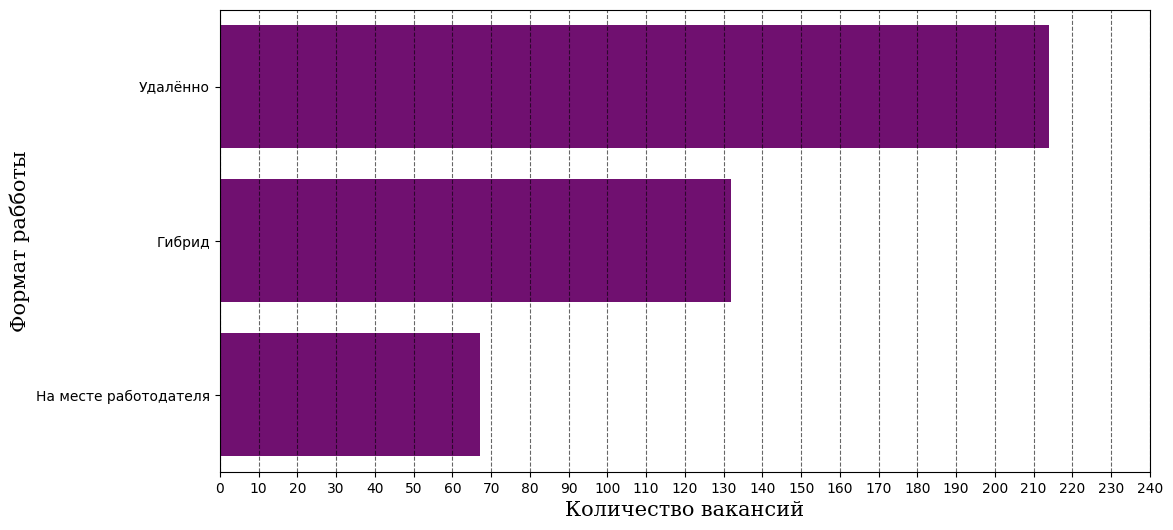

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))


ax = sns.barplot(x=[fresh_vacancies['work_format'].str.contains('Удалённо').sum(),
            fresh_vacancies['work_format'].str.contains('Гибрид').sum(),
            fresh_vacancies['work_format'].str.contains('На').sum()],
            y=['Удалённо', 'Гибрид', 'На месте работодателя'], color='Purple')
ax.grid(axis='x', linestyle='--', alpha=0.6, color='black') # линии сетки по оси у, настраваем стиль линии,  альфа - прозрачность линии, цвет линии - color
grid_x_ticks = np.arange(0, 250, 10) # по оси у настраиваем шкалу от 0 до 140 не включительно с шагом 20
ax.set_xticks(grid_x_ticks)
ax.set_xlabel('Количество вакансий', fontsize=15, fontweight='light', fontfamily='serif', color='black')
ax.set_ylabel('Формат рабботы', fontsize=15, fontweight='light', fontfamily='serif', color='black')

plt.show()

Больше всего вакансий с удаленным форматом работы

In [ ]:
fresh_vacancies['experience'].value_counts().head(20)

,count
experience,
От 3 до 6 лет,228
От 1 года до 3 лет,157
Более 6 лет,27
Нет опыта,12


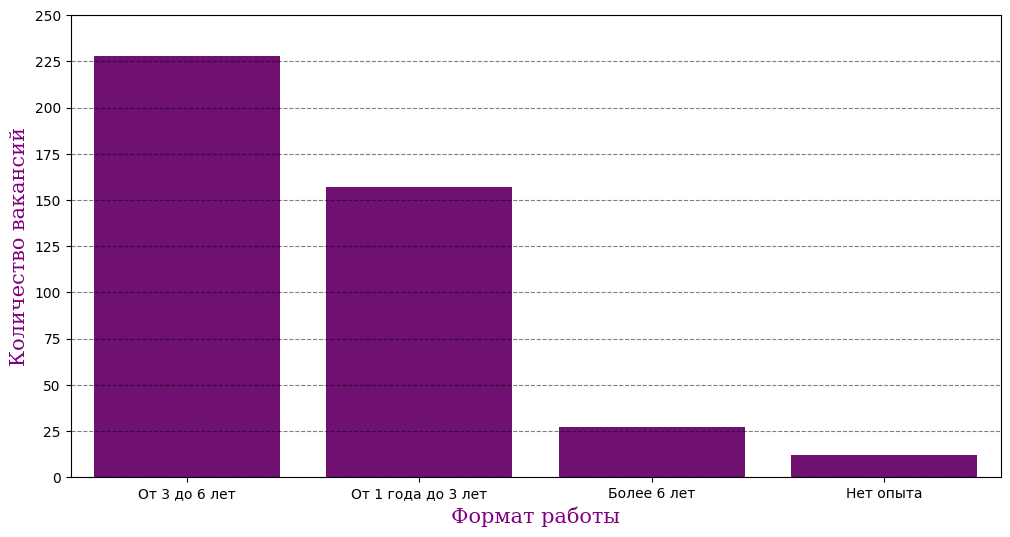

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax = sns.barplot(y=[fresh_vacancies['experience'].str.contains('От 3').sum(),
            fresh_vacancies['experience'].str.contains('От 1').sum(),
            fresh_vacancies['experience'].str.contains('Более 6').sum(),
            fresh_vacancies['experience'].str.contains('Нет').sum()],
            x=['От 3 до 6 лет', 'От 1 года до 3 лет', 'Более 6 лет', 'Нет опыта'], color='Purple')
ax.grid(axis='y', linestyle='--', alpha=0.5, color='black')
grid_y_ticks = np.arange(0, 275, 25)
ax.set_yticks(grid_y_ticks)
ax.set_ylabel('Количество вакансий', fontsize=15, fontweight='light', fontfamily='serif', color='purple')
ax.set_xlabel('Формат работы', fontsize=15, fontweight='light', fontfamily='serif', color='purple')

plt.show()

Требуются сотрудники с опытом

In [ ]:
fresh_vacancies['name'] = fresh_vacancies['name'].str.replace(" ", '').str.replace("'", '').str.replace('"', '').str.replace("/", '').str.replace("]", '').str.replace("[", '').str.replace("-", '').str.replace(":", '')

In [ ]:
fresh_vacancies['name'] = fresh_vacancies['name'].str.replace("(", '').str.replace(")", '').str.replace("\\", '').str.replace(",", '')

In [ ]:
fresh_vacancies['name'].value_counts().tail(10)

,count
name,
DataScientistОптимизациякоммуникаций,1
SeniorDataScientistблокВ2С,1
Аналитикbigdatadatascience,1
DataScientistMiddle+,1
СтаршийразработчикисследовательMLNLP,1
Аналитикdataanalystdatascientistвуправлениепланированияипрогнозирования,1
СтаршийDataScientistвкомандупоисковогоранжирования,1
MLEngineerConsulting,1
MLOpsинженер,1


In [ ]:
all_vacancies = " ".join(fresh_vacancies['name'])
all_vacancies

'Pythonразработчик JuniorDataScientistАналитик DataScientist JuniorDataengineer СтажерDatascientist JuniorDataScientist DataEngineer DataScientistJunior+ Dataengineerjunior Promptengineer АналитикданныхDatascientistдатаинженер Разработчикматематическихмоделей DataScientist DataScientist РуководительЦентрамоделированияибольшихданных AIMLResearcherRobotics&ComputerVision DataEngineer|Инженерданных MachineLearningEngineerMiddle DataAnalystDataEngineer MLengineerjunior+middle Pythonразработчик JuniorDataScientistАналитик DataScientist JuniorDataengineer СтажерDatascientist JuniorDataScientist DataEngineer DataScientistJunior+ Dataengineerjunior Promptengineer АналитикданныхDatascientistдатаинженер Разработчикматематическихмоделей DataScientist DataScientist РуководительЦентрамоделированияибольшихданных AIMLResearcherRobotics&ComputerVision DataEngineer|Инженерданных MachineLearningEngineerMiddle DataAnalystDataEngineer MLengineerjunior+middle SeniorDataEngineer DataScientist DataEngineer J

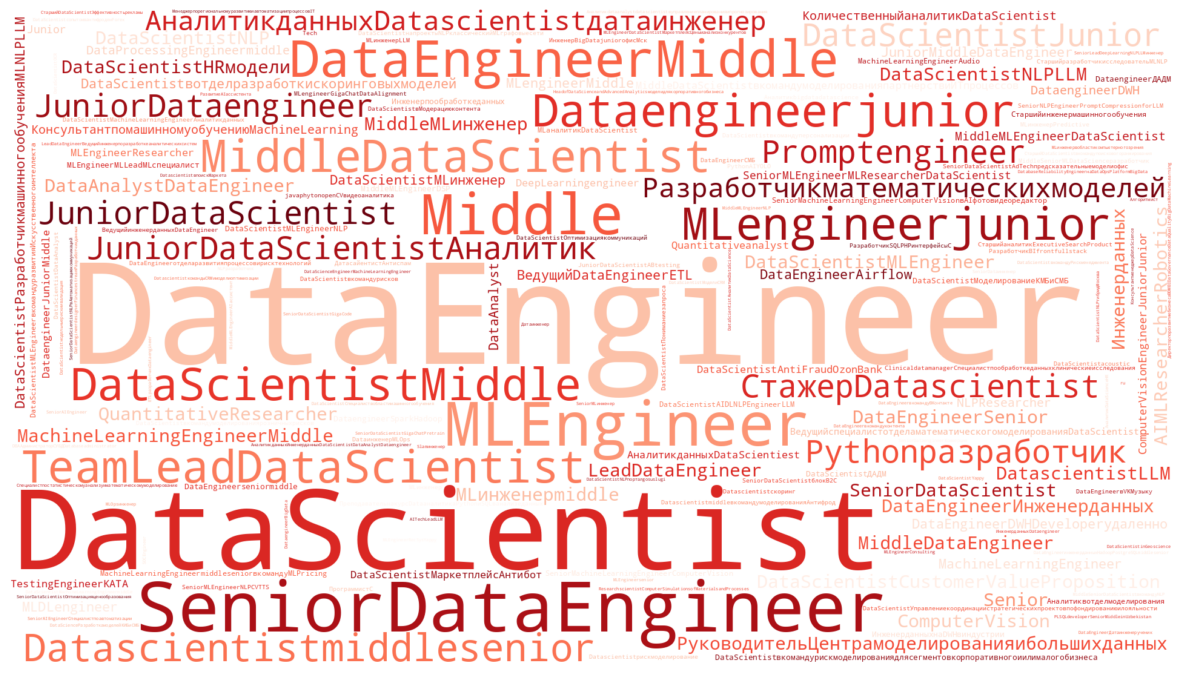

In [ ]:
wordcloud_vac= WordCloud(width=1920, height=1080, background_color='white', colormap='Reds').generate(all_vacancies)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_vac, interpolation='bilinear')
plt.axis('off')
plt.show()

Можно было бы разбить по самым часто встречаемым в вакансиях словам, но вполне очевидно, какое слово будет самым повторяемым, поэтому решено было узнать самые часто встречаемые названия вакансий (самые полные)

In [ ]:
fresh_vacancies.describe()

,salary_starts_from,salary_to
count,53.000000,45.000000
mean,172740.094340,217468.777778
std,159610.397677,177694.758432
min,25.000000,45.000000
25%,50000.000000,80000.000000
50%,150000.000000,200000.000000
75%,240000.000000,350000.000000
max,700000.000000,575000.000000


In [ ]:
# поиск дубликатов
duplicates = fresh_vacancies.duplicated()

# подсчет дубликатов
num_duplicates = duplicates.sum()

In [ ]:
num_duplicates  # Кажется некоторые компании ищут по нескольких сотрудников сразу

20

### Выводы

-Компании ИЦ АЙ-ТЕКО, WB, OZON опубликовали больше всего вакансий в феврале.

-В большинстве вакансий отсуствует важный параметр - зарплата, скорее всего для того, чтобы по итогам собеседования решить данный вопрос.

-Судя по вакансиям с зарплатой, это хорошо оплачиваемая специальность.

-Многие работодатели согласны на удаленку, не против гибрида.

-Чаще всего встречается  в вакансиях короткое сочетание "DataScientist" или "DataEngineer", хотя многие вакансии содержат максимальное описание в названии.

-Большинство вакансий предполагают наличие опыта от 3 до 6 лет, для новичков меньше всего вакансий.

-На рынке есть вакансии с зарплатами в иностранной валюте с довольно неплохим разбросом, для вакансий с долларовыми запралатами практически полностью предусомтрен удаленный формат работы, для этих вакасний необхолим опыт от 3 до 6 лет и более, но и зарплаты очень хорошие.

-Возможно, некоторые компании ищут несколько сотрудников сразу.
